# **HOTEL BOOKING DEMAND**


Pada dasarnya sebuah bisnis hotel adalah pengelolaan dan pemanfaatan sebuah bangunan atau area sebagai sebuah tempat tinggal sementara waktu dengan tujuan untuk mendapatkan keuntungan secara finansial. Oleh karena itu, pemanfaatan kamar yang tersedia secara efektif dan optimal menjadi salah satu hal yang perlu diperhatikan untuk memaksimalkan keuntungan. Selain itu, sebuah bisnis hotel didasari oleh pemberian pelayanan yang terbaik untuk menciptakan kenyamanan dan pengalaman yang baik untuk seluruh konsumennya, sehingga *brand image* merupakan hal yang sangat penting.
## Problem Statement
Saat ini teknologi telah memudahkan para calon konsumen hotel untuk mencari dan melakukan pemesanan kamar hotel, khususnya dengan adanya layanan *online*. Namun, selain keuntungan yang diberikan, hal ini pun berimbas meningkatnya tingkat pembatalan pemesanan kamar hotel, sehingga menyebabkan hotel tidak dapat mengoptimalisasi ketersediaan kamar hotel dan terbuangnya beberapa persediaan hotel yang sebagian besar bersifat tidak tahan lama. Hal tersebut memberikan efek negatif terhadap bisnis dan keuntungan.
## Goals
Berdasarkan permasalahan tersebut, dibutuhkan sebuah model prediktif yang dapat digunakan untuk memprediksi pembatalan pemesanan kamar hotel. Hal ini ditujukan untuk mengoptimalkan ketersediaan kamar, sehingga dapat memaksimalkan keuntungan.

**Target**
* 0 : Tidak melakukan pembatalan pemesanan kamar hotel.
* 1 : Melakukan pembatalan pemesanan kamar hotel.
## Analytical Approach
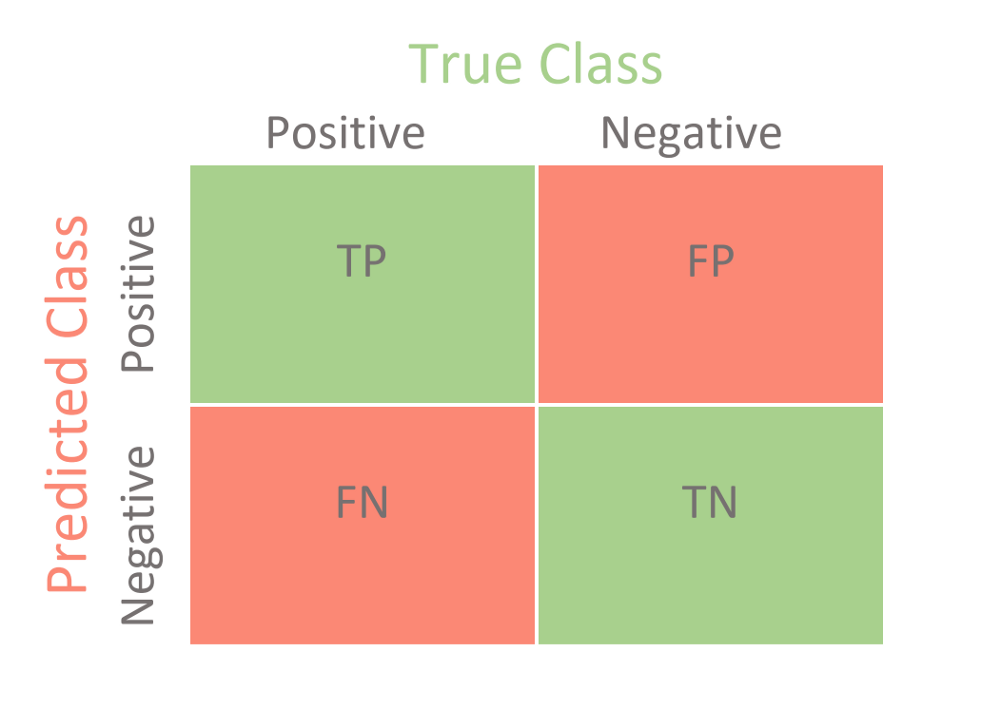

Berdasarkan *confusion matrix* diatas, berikut merupakan pengaruh kesalahan/eror terhadap bisnis:

* FN : Prediksi *not canceled*, Aktual *canceled*, sehingga bisnis hotel akan kehilangan biaya untuk beberapa persediaan hotel yang sebagian besar bersifat tidak tahan lama dan kehilangan keuntungan optimal karena, kamar hotel menjadi tidak terpakai. 
* FP :  Prediksi *canceled*, Aktual *not canceled*, sehingga dapat menyebabkan kesan yang kurang baik bagi calon konsumen dan dapat menurunkan *brand image* hotel.

Berdasarkan konsekuensi kesalahan tersebut, *metrics evaluation* yang akan dugunakan adalah *f-1 Score*, karena konsekuensi tersebut perlu diperhatikan dan dapat berdampak negatif untuk bisnis hotel.

# Data Understanding

In [1]:
#Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Dataset
df=pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Untuk itu *feature* dan *target* yang akan digunakan adalah sebagai berikut:
* Feature : ['country','market_segment','previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']
* Target :['is_canceled']

In [3]:
def Check (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:10])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    pd.set_option('display.max_colwidth', None)
    check=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return check

In [4]:
Check(df) # Cek kolom Dataset

,Columns,Dtype,Nunique,Missing Value,Unique
0,country,object,162,351,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL]"
1,market_segment,object,8,0,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,int64,15,0,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26]"
3,booking_changes,int64,19,0,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8]"
4,deposit_type,object,3,0,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,115,0,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79]"
6,customer_type,object,4,0,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,10,0,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,5,0,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,6,0,"[0, 2, 1, 3, 4, 5]"


**Feature Dictionary**
* country : Negara asal calon tamu hotel.
* market_segment : Tipe *market segment* calon tamu hotel.
* previous_cancellations : Pembatalan yang sebelumnya telah dilakukan.
* booking_changes : Perubahan yang dilakukan dalam pemesanan.
* deposit_type : Tipe deposit yang dilakukan.
* days_in_waiting_list : Jumlah hari pesanan didalam *waiting list*.
* customer_type : Tipe calon tamu hotel.
* reserved_room_type : Tipe kamar yang dipesan calon tamu hotel.
* required_car_parking_spaces : Tempat parkir yang dibutuhkan calon tamu hotel dengan asumsi calon tamu hotel menginformasikan kebutuhan tempat parkir.
* total_of_special_requests : Permintaan spesial yang diminta calon tamu hotel.

**Feature Data Type**
* int64 : ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
* object : ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

**Missing Value**
* country : 351
* market_segment : 'Undifined'

## Data Imbalance Checking

In [5]:
df['is_canceled'].value_counts() # Proporsi target

0    52795
1    30778
Name: is_canceled, dtype: int64

In [6]:
(df['is_canceled'].value_counts()/len(df))*100 # Persentase proporsi target

0    63.172316
1    36.827684
Name: is_canceled, dtype: float64

Data target `is_canceled` memiliki persentase proporsi sebesar 63.17% : 36.82%. 

## Missing Value

### Missing Value `market_segment`

In [7]:
df['market_segment'].value_counts()

Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: market_segment, dtype: int64

In [8]:
df.drop(df[df['market_segment']=='Undefined'].index,inplace=True)# Menghapus missing value dalam data market_segment
df['market_segment'].value_counts()

Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: market_segment, dtype: int64

### Missing Value `country`
Pengisian missing value akan dilakukan pada *Column Transformer* melalui *Simple Imputer*

## Feature Information

In [9]:
df.drop(columns='is_canceled').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83572 entries, 0 to 83572
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83221 non-null  object
 1   market_segment               83572 non-null  object
 2   previous_cancellations       83572 non-null  int64 
 3   booking_changes              83572 non-null  int64 
 4   deposit_type                 83572 non-null  object
 5   days_in_waiting_list         83572 non-null  int64 
 6   customer_type                83572 non-null  object
 7   reserved_room_type           83572 non-null  object
 8   required_car_parking_spaces  83572 non-null  int64 
 9   total_of_special_requests    83572 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.0+ MB


### Categorical Data
`country`, `market_segment`, `deposit_type`, `deposit_type`

In [10]:
# Table
df.describe(include='O')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83221,83572,83572,83572,83572
unique,162,7,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34096,39460,73351,62732,60041


#### EDA

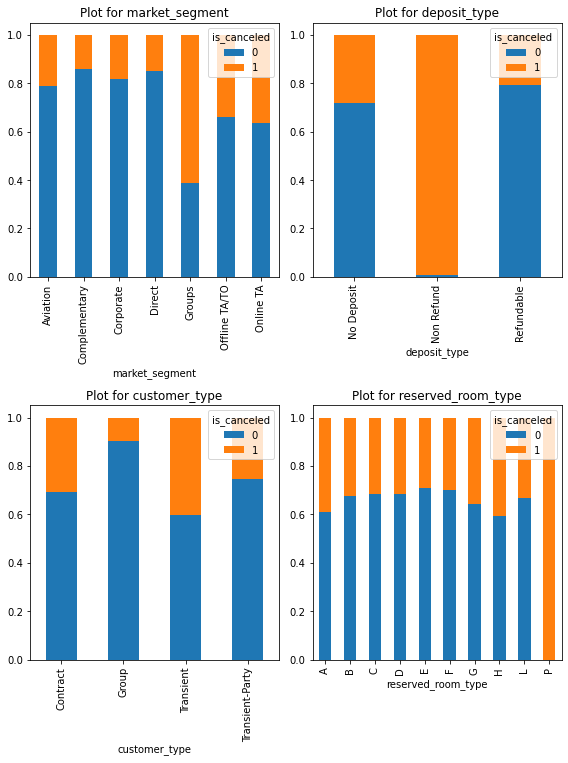

In [11]:
# Visualisasi
count=0
fig = plt.figure(figsize=(8,20))
categorical_feature=df[['market_segment','deposit_type','customer_type','reserved_room_type']]
for feature in categorical_feature:
    count +=1 
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[feature],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    plt.title("Plot for {}".format(feature))
    fig.tight_layout()
plt.show()

Hasil visualisasi data diatas menunjukan:
* `market_segment` : Calon tamu hotel dari tipe *market segment* **Groups** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `market_segment`.
* `deposit_type` : Calon tamu hotel yang tidak mendapatkan jaminan pengembalian deposit atau memiliki tipe **Non Refund** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `deposit_type`.
* `customer_type` : Calon tamu hotel dengan tipe **Transient** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `customer_type`.
* `reserved_room_type` : Calon tamu hotel yang memesan kamar tipe **P** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `reserved_room_type`.

### Numerical Data
`previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`

In [12]:
# Table
df.drop(columns='is_canceled').describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,83572.000000,83572.000000,83572.000000,83572.000000,83572.000000
mean,0.086799,0.220899,2.330589,0.063000,0.573206
std,0.841015,0.648638,17.673155,0.246921,0.795167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000


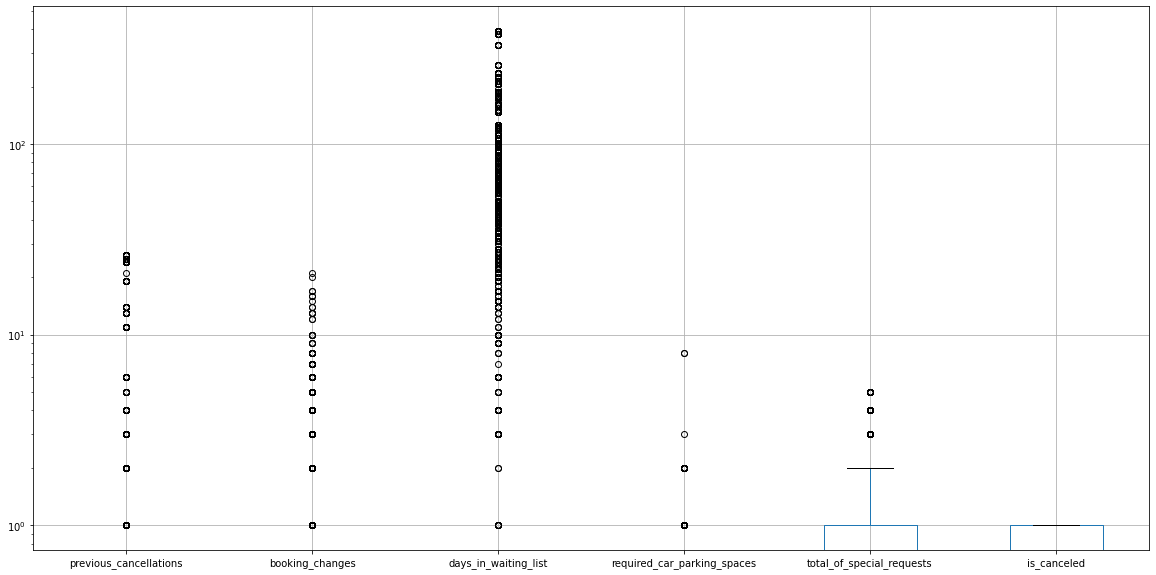

In [13]:
# Visualization
plt.figure(figsize=(20,10))
df.boxplot()
plt.yscale('log')
plt.savefig('Boxplot')
plt.show()

Tabel dan visualisasi tersebut menunjukan feature `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces` memiliki sebaran data terpusat di angka 0 dan memiliki outliers dengan nilai yang tinggi. Oleh karena itu, dilakukan pengelompokan sebagai berikut:
* `previous_cancellations`
    * 0 : Belum pernah melakukan pembatalan.
    * 1 : Pernah melakukan pembatalan.
* `booking_changes`
    * 0 : Belum pernah melakukan perubahan *booking*.
    * 1 : Pernah melakukan perubahan *booking*.
* `days_in_waiting_list`
    * 0 : Tidak masuk didalam *waiting list*.
    * 1 : Masuk didalam *waiting list*.
* `required_car_parking_spaces`
    * 0 : Tidak membutuhkan tempat parkir.
    * 1 : Membutuhkan tempat parkir.

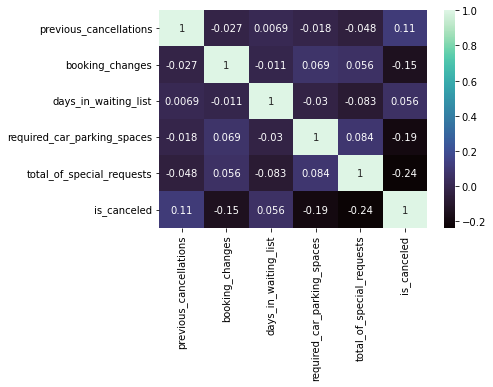

In [14]:
# Korelasi sebelum dilakukan pengelompokan
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.show()

In [15]:
# Pengelompokan
df['previous_cancellations']=df['previous_cancellations'].apply(lambda x : 1 if x>0 else 0)
df['booking_changes']=df['booking_changes'].apply(lambda x : 1 if x>0 else 0)
df['days_in_waiting_list']=df['days_in_waiting_list'].apply(lambda x : 1 if x>0 else 0)
df['required_car_parking_spaces']=df['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0)

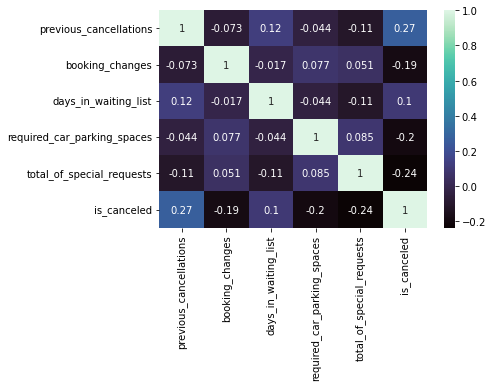

In [16]:
# Korelasi setelah dilakukan pengelompokan
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.show()

Setelah dilakukan pengelompokan terjadi perubahan korelasi antar feature, tetapi tidak signifikan.

#### EDA

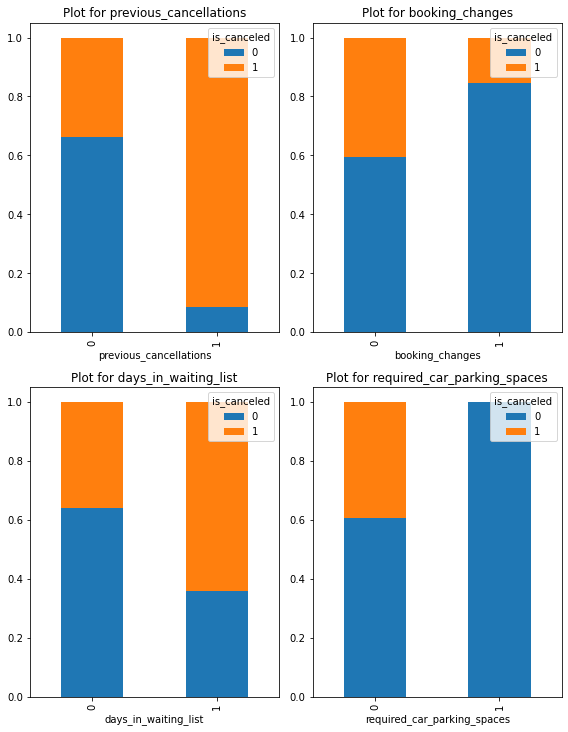

In [17]:
# Visualisasi
count=0
fig = plt.figure(figsize=(8,20))
categorical_feature=df[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces']]
for feature in categorical_feature:
    count +=1 
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[feature],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    plt.title("Plot for {}".format(feature))
    fig.tight_layout()
plt.show()

Hasil visualisasi data diatas menunjukan:
* `previous_cancellations` : Calon tamu hotel yang **pernah melakukan pembatalan sebelumnya** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `previous_cancellations`.
* `booking_changes` : Calon tamu hotel yang **tidak melakukan perubahan dalam pemesanan** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `booking_changes`.
* `days_in_waiting_list` : Calon tamu hotel yang **masuk kedalam daftar tunggu** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `days_in_waiting_list`.
* `required_car_parking_spaces` : Calon tamu hotel yang **tidak membutuhkan tempat parkir** menjadi calon tamu dengan tingkat pembatalan terbesar pada *feature* `required_car_parking_spaces`.

# Data Preprocessing

## Data Splitting
* Feature : ['country','market_segment','previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']
* Target :['is_canceled']

In [18]:
# Library
from sklearn.model_selection import train_test_split

In [19]:
# Splitting x dan y
x=df.drop(columns='is_canceled')
y=df['is_canceled']

In [20]:
# Data Splitting
x_train, x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=2)

## Data Transformer
* one hot : ['deposit_type','customer_type','market_segment']
* binary : ['country','reserved_room_type']

In [21]:
# Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [22]:
# Pipeline
country_pipe=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('binary',ce.BinaryEncoder())
])

In [23]:
# Column Transformer
transformer=ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['deposit_type','customer_type','market_segment']),
    ('pipeline',country_pipe,['country','reserved_room_type']),
],remainder='passthrough')

# Modelling

In [24]:
#Library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier

In [25]:
# Model
logreg=LogisticRegression(max_iter=200,random_state=2)
tree=DecisionTreeClassifier(max_depth=3,random_state=2)
knn=KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(max_depth=3,random_state=2)
xgb = XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)
ada=AdaBoostClassifier(tree,n_estimators=200,learning_rate=0.1,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)

## Model Selection

In [26]:
# Library
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [27]:
# Cross Validation
models=[logreg,tree,knn,rf,xgb,ada,gbc]
score=[]
rata=[]
std=[]
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('processing',transformer),
        ('model',i)
    ])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

In [28]:
# Cross Validation Result
pd.DataFrame({
    'model':['logreg','tree','knn','rf','xgb','ada','gbc'],
    'mean':rata,
    'std':std
}).set_index('model')

,mean,std
model,,
logreg,0.652485,0.007170
tree,0.593554,0.064140
knn,0.690823,0.010034
rf,0.534559,0.006745
xgb,0.710199,0.003632
ada,0.719943,0.004534
gbc,0.713514,0.002738


Tabel tersebut menunjukan model dengan hasil cross validasi lebih dari 70% adalah XGBoost Classifier, Ada Boost Classifier, dan Gradient Boost. Ketiga model tersebut menjadi model *benchmark* untuk *data test*. 

## Model Test

In [29]:
# Library
from sklearn.metrics import classification_report

In [30]:
# Model
model={
    'xgb':XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2),
    'ada':AdaBoostClassifier(tree,n_estimators=200,learning_rate=0.1,random_state=2),
    'gbc':GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)
}

In [31]:
# Model Test
for i,j in model.items():
    estimator=Pipeline([
    ('processing',transformer),
    ('model',j)
    ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    score=f1_score(y_test,y_pred)
    print(i)
    print(classification_report(y_test,y_pred))

xgb
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15839
           1       0.78      0.65      0.71      9233

    accuracy                           0.80     25072
   macro avg       0.80      0.77      0.78     25072
weighted avg       0.80      0.80      0.80     25072

ada
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15839
           1       0.79      0.65      0.71      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.77      0.78     25072
weighted avg       0.80      0.81      0.80     25072

gbc
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15839
           1       0.79      0.64      0.71      9233

    accuracy                           0.80     25072
   macro avg       0.80      0.77      0.78     25072
weighted avg       0.80      0.80      0.80     25072



Hasil tersebut menunjukan bahwa model XGBoost Classifier, Ada Boost Classifier, dan Gradient Boost Classifier memiliki hasil *f1-score* yang mendekati sama pada *data test* , sehingga dilakukan tuning dan pencarian model terbaik.

# Tuning

In [32]:
# Library
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [33]:
# Model
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)
ada=AdaBoostClassifier(tree,n_estimators=200,learning_rate=0.1,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)

In [34]:
# Estimator
tunning_models=[xgb,ada,gbc]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),
        ('model',model)
    ])

In [35]:
# Hyperparam Space
hyperparam=[
    {'model':[xgb],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[3,5,7,9,11]},
    {'model':[xgb],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[3,5,7,9,11]},
    {'model':[xgb],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000],
    'model__max_depth':[3,5,7,9,11]},
    {'model':[ada],
    'model__learning_rate':[0.1],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[200]},
    {'model':[ada],
    'model__learning_rate':[0.01],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[500]},
    {'model':[ada],
    'model__learning_rate':[0.001],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[1000]},
    {'model':[gbc],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000],
    'model__max_depth':[1,2,3,4,5]},
    
]

In [36]:
# Grid Search
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
                 n_jobs=-1)

In [37]:
# Fitting
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['deposit_type',
                                                                          'customer_type',
                                                                          'market_segment']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='cons...
                          'model__n_estimators': [200]},
                         {'model': [GradientBoostingClassifier(n_estimators=200,
                                                               random_state=2)],
                          'model__learning_rate': [0.01],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [500]},
                         {'model': [GradientBoostingClassifier(n_estimators=200,
                                                               random_state=2)],
                          'model__learning_rate': [0.001],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [1000]}],
             scoring='f1')

In [38]:
# Best Param and Best Score
grid.best_params_, grid.best_score_

({'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=11, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=2, ...),
  'model__learning_rate': 0.01,
  'model__max_depth': 11,
  'model__n_estimators': 500},
 0.729023848888155)

Hasil tersebut menunjukan model XGBoost Classifier dengan *learning_rate* : 0.01, *max_depth* : 11, dan *n_estimators* : 500  sebagai model terbaik untuk digunakan pada *data test*.

## Before vs After Tuning

In [39]:
# Before Tuning
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=3,random_state=2)
estimator=Pipeline([
    ('processing',transformer),
    ('model',xgb)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)
print(classification_report(y_test,y_pred_before))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15839
           1       0.78      0.65      0.71      9233

    accuracy                           0.80     25072
   macro avg       0.80      0.77      0.78     25072
weighted avg       0.80      0.80      0.80     25072



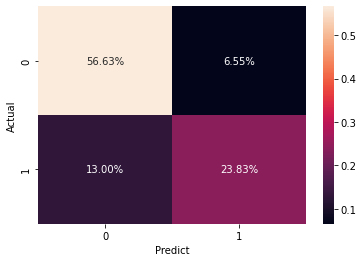

In [58]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_before)/np.sum(confusion_matrix(y_test,y_pred)),annot=True,fmt='.2%')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [40]:
# After Tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     15839
           1       0.77      0.69      0.73      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.78      0.79     25072
weighted avg       0.81      0.81      0.81     25072



In [53]:
from sklearn.metrics import confusion_matrix

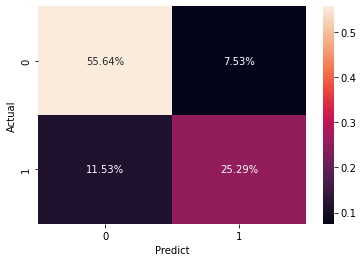

In [59]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_after)/np.sum(confusion_matrix(y_test,y_pred)),annot=True,fmt='.2%')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Hasil tersebut menunjukan bahwa setelah dilakukan tuning nilai *f1-score* model lebih baik dari model sebelum dilakukan tuning atau meningkat sebesar 2% dan menyeimbangkan nilai kesalahan/eror FN dan FP pada confusion matrix. 

## Feature Importances

In [41]:
# Feature
features=list(best_model[0].transformers_[0][1].get_feature_names_out())+(best_model[0].transformers_[1][1][1].get_feature_names())+list(x.columns[best_model[0].transformers_[2][2]])

In [42]:
# Feature Importance
pd.DataFrame({'imp':best_model[1].feature_importances_},index=features).sort_values('imp',ascending=False).head()

,imp
deposit_type_Non Refund,0.771530
required_car_parking_spaces,0.065173
market_segment_Online TA,0.062884
previous_cancellations,0.020780
0_7,0.011881


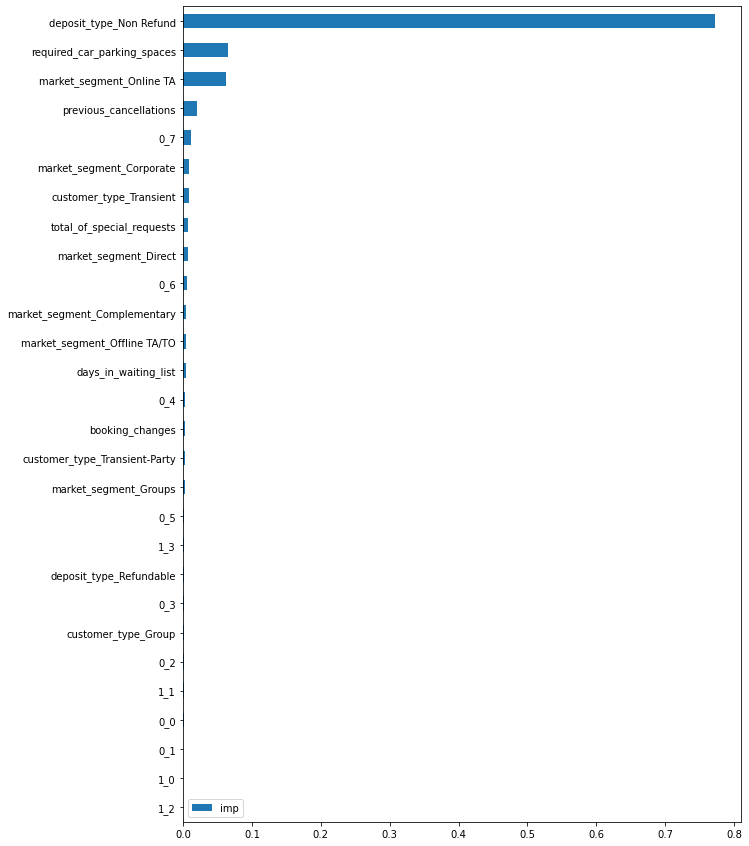

In [43]:
# Visualizatin
pd.DataFrame({'imp':best_model[1].feature_importances_},index=features).sort_values('imp',ascending=True).plot(kind='barh',figsize=(10,15))
plt.show()

Berdasarkan hasil *feature importances*, *feature* yang memiliki nilai paling penting dalam melakukan prediksi adalah `deposit_type_Non_refund`, diikuti oleh *feature* `required_car_parking_spaces` dan `market_segment_Online_TA`. Hal tersebut menunjukan bahwa tidak adanya jaminan pengembalian deposit, penting dalam memprediksi pembatalan. Selain itu, kebutuhan tempat parkir dan tipe *market segment online* pun memiliki nilai yang penting untuk memprediksi pembatalan. 

# Saving Model

In [60]:
# Library
import pickle

In [61]:
# Fitting
best_model=grid.best_estimator_
best_model.fit(x,y)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['deposit_type',
                                                   'customer_type',
                                                   'market_segment']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['country',
                                                   'reserved_room_type'])])),
                ('model',
                 XGBCl...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=11, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=2, ...))])

In [63]:
# Saving Model
pickle.dump(best_model,open('Hotel_Demand_Model.sav','wb'))

# Conclusion and Recommendation
## Conclusion
* Berdasarkan hasil analisis yang dilakukan, model dengan performa terbaik adalah XGBoost Classifier dengan  *learning_rate* : 0.01, *max_depth* : 11, dan *n_estimators* : 500.
* `deposit_type_Non_refund`, `required_car_parking_spaces`, dan `market_segment_Online_TA` merupakan 3 *feature* yang memiliki nilai paling penting dalam melakukan prediksi.
* Model dapat memprediksi 85% calon tamu hotel yang tidak akan melakukan pembatalan dan memprediksi 73% calon tamu hotel yang akan melakukan pembatalan berdasarkan hasil *f1-score*.
## Recommendation
* Menambah *feature* lain yang dapat berhubungan dengan pembatalan, seperti waktu pemesanan hingga booking dan tanggal kedatangan.
* Menggunakan model *machine learning* lain, seperti CatBoot Classifier dan Light Gradient Boosting Classifier.
* Memperketat pilihan *non refundable deposit* dengan *no cancellation policy* untuk meyakinkan calon tamu hotel untuk tidak melakukan pembatala.
* Mengonfirmasi kembali kedatangan calon tamu, khususnya yang memiliki tipe *market segment online*, sehingga dapat memasarkan kembali kamar (apabila pembatalan dikonfirmasi) untuk mengoptimalkan ketersediaan kamar dan keuntungan. 
* Memberikan kemudahan untuk calon tamu melakukan permintaan seperti kebutuhan tempat parkir, karena dengan adanya permintaan, calon memiliki kemungkinan yang lebih tinggi untuk tidak melakukan pembatalan.
* Menggunakan model prediksi ini untuk mengoptimalkan ketersediaan kamar dan memaksimalkan keuntungan.